In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pylab import plot, show, xlabel, ylabel

In [27]:
def get_data():
    # load data
    df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
    print(df.head())
    data = df.as_matrix()
    print("Total Records : ", data.shape)

    # features
    X = data[:,:-1]
    # outputs
    y = data[:,-1:]

    noOfFeatures = X.shape[1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

    return X_train, y_train, X_test, y_test, noOfFeatures

In [28]:
X_train, y_train, X_test, y_test, noOfFeatures = get_data()

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
Total Records :  (200, 4)


In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(170, 3)
(170, 1)
(30, 3)
(30, 1)


#### What are the features?

1. TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
2. Radio: advertising dollars spent on Radio
3. Newspaper: advertising dollars spent on Newspaper

#### What is the response?

4. Sales: sales of a single product in a given market (in thousands of items)

#### What else do we know?

5. Because the response variable is continuous, this is a **regression** problem.
6. There are 200 observations (represented by the rows), and each observation is a single market.

### Linear regression

**Pros**: fast, no tuning required, highly interpretable, well-understood

**Cons**: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$h_\theta(x) = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + ... + \theta_nx_n$

where $x_0 = 1$

$\theta = [\theta_0, \theta_1, \theta_2, \theta_3, ..., \theta_n] ∊ R^{n+1}$

$X = [x_0, x_1, x_2, x_3, ..., x_n] ∊ R^{n+1}$

$h_\theta(x) = \theta^TX$

### Idea

Compute/Choose $\theta$(s) so that $h_\theta(x)$ is close to $y$ for $(x, y)$

In [36]:
X_test[0]

array([ 69.2,  20.5,  18.3])

In [37]:
y_test[0]

array([ 11.3])

In [39]:
def featureNormalize(X):
    mean_r = []
    std_r = []

    X_norm = X
    n_c = X.shape[1]
    for i in range(n_c):
        meanOfCurrentFeatureInX = np.mean(X[:, i])
        stdOfCurrentFeatureInX = np.std(X[:, i])
        mean_r.append(meanOfCurrentFeatureInX)
        std_r.append(stdOfCurrentFeatureInX)
        if (stdOfCurrentFeatureInX == 0.0 or stdOfCurrentFeatureInX == 0):
            X_norm[:, i] = X_norm[:, i]
        else:
            X_norm[:, i] = (X_norm[:, i] - meanOfCurrentFeatureInX) / stdOfCurrentFeatureInX

    return X_norm, mean_r, std_r

In [52]:
X_train_norm, mu, sigma = featureNormalize(X_train)
X_test_norm, test_mu, test_sigma = featureNormalize(X_test)

In [53]:
X_test_norm[0]

array([-0.82426665, -0.11179617, -0.45368815])

In [54]:
theta = np.matrix(np.zeros((noOfFeatures + 1, 1), dtype=np.float))

In [55]:
theta.shape

(4, 1)

In [56]:
theta[0]

matrix([[ 0.]])

In [57]:
# Adding intercept term to X
X_train_norm = np.column_stack((np.ones(len(X_train_norm), dtype=np.float), X_train_norm))
X_test_norm = np.column_stack((np.ones(len(X_test_norm), dtype=np.float), X_test_norm))

X_train_norm.shape

(170, 4)

In [58]:
X_train_norm[0]

array([ 1.        , -0.94089378,  0.89442454,  3.76375893])

### Cost Function / Sum of Squared Errors

$J(\theta) = \frac{1}{(2m)} \sum_{i=1}^m (h(\theta)^i - y^i)^2$ 

In [59]:
def computeCost(X, y, theta):
    m = y.shape[0]
    predictions = X.dot(theta)
    sqErrors = (predictions - y)
    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)
    return J

### Gradient Descent

$\theta_j = \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta)$

$\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^i) - y^i) \space x_j^i$

<img src="./grad_desc.png" />

<img src="./grad_desc_1.png" />

<img src="./grad_desc_2.png" />

In [61]:
def gradientDescent(X, y, theta, alpha, num_iters):
    cost = np.zeros(num_iters, dtype=float)
    m = len(X)

    for i in range(num_iters):
        error = (X * theta) - y
        newDecrement = (alpha * (1/m) * np.dot(error.T, X))
        theta = theta - newDecrement.T

        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [63]:
def predict(inputVector, theta):
    return np.dot(inputVector, theta.T)

def plot2DGraph(x, y, xLabel, yLabel):
    plot(np.arange(x), y)
    xlabel(xLabel)
    ylabel(yLabel)
    return show()

In [65]:
alpha = 0.01
num_iters = 400

# perform linear regression on the data set
computed_theta, J_history = gradientDescent(X_train_norm, y_train, theta, alpha, num_iters)

In [66]:
computed_theta

matrix([[ 13.89080059],
        [  3.73854394],
        [  2.80374197],
        [  0.04208094]])

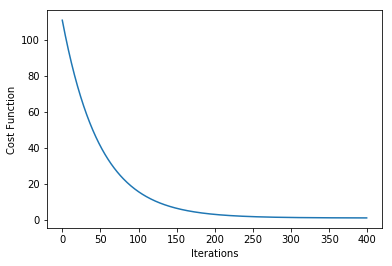

In [68]:
plot2DGraph(num_iters, J_history, 'Iterations', 'Cost Function')

In [70]:
# get the cost (error) of the model
cost = computeCost(X_train_norm, y_train, computed_theta)
cost

matrix([[ 1.2230339]])

In [71]:
predict = np.dot(X_test_norm, computed_theta)

print(y_test[0:5])
print(predict[0:5])

[[ 11.3]
 [  8.4]
 [  8.7]
 [ 25.4]
 [ 11.7]]
[[ 10.47670425]
 [  8.00453451]
 [  7.73444121]
 [ 24.25857534]
 [ 12.6512422 ]]


#### End -- Congratulations on taking your first step in Machine Learning -- Thank you